In [136]:
import math
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from sklearn import metrics

In [190]:


# A class for LIF , NLIF and ALIF Model.

class LIF:
    
    
    # this function will initialize model.
    
    def __init__(self , dt = 0.1 , uRest=-65,uReset = -65, R=10, tau=8, treshold=-45, uSpike = 5 , duration=100 , uStart = -80 ,
        isNLIF = False , thetaRH = -55 , dtSharpness = 0.8 ,
        isALIF = False , tauK = 1  , currentModel = 1 , aValue = 0.02 , bValue = 0.4 ,
        numOfTest = 500 , maxCurrent = 5  , freqCount = 1 ,
                neuronMode = 0 ):
        
        self.dt = dt
        self.uRest = uRest
        self.uReset = uReset
        self.R = R
        self.tau = tau
        self.tauK = tauK
        self.treshold = treshold
        self.duration = duration
        self.uSpike = uSpike
        self.uStart = uStart
        self.spike = []
        self.time = []
        self.singleTime = 0
        self.current = []
        self.u = []
        self.w = []
        self.wTemp = 0
        self.thetaRH = thetaRH
        self.exponentialValue = 0
        self.adaptiveValue = 0
        self.isNLIF = isNLIF
        self.isALIF = isALIF
        self.dtSharpness = dtSharpness
        self.fireCount = 0
        self.currentModel = currentModel
        self.aValue = aValue
        self.bValue = bValue
        
        self.neuronMode = neuronMode
        
        self.numOfTest = numOfTest
        self.maxCurrent = maxCurrent
        self.freqCount = freqCount
        self.temp = self.uStart
        
        
        # initialize time array
        for i in range(0, int(duration/dt), 1):
            self.time.append(i * dt)
        self.u.append(uStart) 
        self.w.append(0)
   
        
    
        
    # this function will be used for making a list of currents
    def currentFunc(self):
            
           # fixed current
            if(self.currentModel == 1):
                for i in range(len(self.time)):
                    self.current.append(2.5)
            # linear current        
            elif (self.currentModel == 2):
                for i in range(len(self.time)):
                        self.current.append(3)
            # sin current 
            elif (self.currentModel == 3):
                for i in range(len(self.time)):
                    self.current.append(3.5)
                    
            # power 2 current 
            elif (self.currentModel == 4):
                for i in range(len(self.time)):
                    #self.current.append((pow(i-100,2)+2)/2000)
                    self.current.append(math.sin(i*self.dt/5)/5+3)
            # random current between 1 and 6
            elif (self.currentModel == 5):
                for i in range(len(self.time)):
                    self.current.append(random.randrange(1, 6))
            # random current be
            elif (self.currentModel == 6):
                for i in range(len(self.time)):
                     self.current.append((math.floor(i*self.dt)/50)+1.7)
            elif (self.currentModel == 7):
                for i in range(len(self.time)):
                    self.current.append(2.5*math.cos(i*self.dt)+0.5*math.sin(i*self.dt)+3)
                    
            # current for frequency
            if(self.currentModel == 8):
                for i in range(len(self.time)):
                    self.current.append(self.freqCount * self.maxCurrent / self.numOfTest)
        
    

  

    # potential function to find potential base on current 
    def potential(self)-> bool:
            
          
                
            #self.temp = self.uStart     #temp value for latest u
            #for i in range(0, len(self.time)):
                self.exponentialValue = 0
                i = (int)(self.singleTime / self.dt)
                
                #if the model is exponential
                if (self.isNLIF == True):
                    self.exponentialValue =(self.dtSharpness * math.exp((self.temp - self.thetaRH)/self.dtSharpness))
                
                # if the model adaptive
                if (self.isALIF == True):
                    dw = ((((self.aValue*(self.temp-self.uRest))-self.wTemp) / self.tauK) + (self.bValue * self.fireCount))
                    self.wTemp = (dw * self.dt) + self.wTemp  #latar should be multiply by R
                    
                    
                    
                #start calculating du    
                du = ( (-1*(self.temp-self.uRest)) + (self.R * self.current[i-1]) + self.exponentialValue - (self.R * self.wTemp)) 
                du = (du* self.dt)/ self.tau
                self.temp = du + self.temp
                spike = False
                self.singleTime += self.dt
                #if passes treshold
                if self.temp >= self.treshold:
                    spike = True
                    self.u.append(self.uSpike+self.temp)
                    self.u.append(self.uReset)
                    self.fireCount += 1
                    #i += 1
                
                    self.spike.append(self.time[i-1])
                    self.temp = self.uReset
                    return True
                else:
                    #self.u.append(self.temp) 
                    return False
                    
                
                    
                #self.w.append(self.wTemp)
                #yield {'potential': self.temp, 'spike': spike}
                
                          
                     
                
                
    def uTimePlot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.u)))), self.u,'blue')
        
        plt.xlabel("time")
        plt.ylabel("potential")
        if (self.isALIF == True):
            plt.figtext(1.2, 0.2, f"Total time frame: {self.duration} \n dt: {self.dt} \n Rm: {self.R} \n tau: {self.tau} \n treshold: {self.treshold} \n vRest: {self.uRest} \n Vreset:{self.uReset} \n Vspike: {self.uSpike} \n Vstart: {self.uStart} \n Vrh: {self.thetaRH} \n a: {self.aValue} \n b: {self.bValue} \n dtSharpness: {self.dtSharpness}", ha="right", fontsize=10)
        else:
            plt.figtext(1.2, 0.2, f"Total time frame: {self.duration} \n dt: {self.dt} \n Rm: {self.R} \n tau: {self.tau} \n treshold: {self.treshold} \n vRest: {self.uRest} \n Vreset:{self.uReset} \n Vspike: {self.uSpike} \n Vstart: {self.uStart} \n", ha="right", fontsize=12)
        plt.show()
        
    
        
        
    def wTimePlot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.w)))), self.w,'cyan')
        plt.xlabel("time")
        plt.ylabel("adaptation current")
        plt.show()    
        

    
    def plotCurrent(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.current)))), self.current,'red')
        plt.xlabel("time")
        plt.ylabel("input current")
        plt.show()
        


# part1

In [147]:
def STDPfunc(neurons, time = 100, Aplus = 1, Aminus = -1):
    
    NumNeurons = len(neurons)
    deltaT = []
    for i in range(NumNeurons):
        deltaTtemp = []
        for j in range(NumNeurons):
            deltaTtemp.append([])
        deltaT.append(deltaTtemp)
    
    deltaW = []
    for i in range(NumNeurons):
        deltaWtemp= []
        for j in range(NumNeurons):
            deltaWtemp.append([])
        deltaW.append(deltaWtemp)

    weight_init = 1 / NumNeurons
    weights = np.ones((NumNeurons, NumNeurons, len(neurons[0].time)))
    weights *= weight_init 
    for t in range(1, len(neurons[0].time)):
        for i in range(NumNeurons):
            fireSpike = neurons[i].potential()
            if fireSpike:
                for index, other in enumerate(neurons):
                    if i != index:
                        if len(neurons[index].spike) != 0 and neurons[i].spike[-1] != 0:
                            
                            deltaT[index][i].append(neurons[i].spike[-1] - neurons[index].spike[-1])# LTP happening
                            deltaW[index][i].append(Aplus * math.exp(-1 * math.fabs(deltaT[index][i][-1])))
                            deltaT[i][index].append(neurons[index].spike[-1] - neurons[i].spike[-1])# LTD happening
                            deltaW[i][index].append(Aminus * math.exp(-1 * math.fabs(deltaT[i][index][-1])))
                            # update weights of neurons
                            weights[i, index, t:] = deltaW[i][index][-1] * neurons[0].dt + weights[i, index, t-1]
                            if weights[i, index, t] < 0: weights[i, index, t:] = 0
                            weights[index, i, t:] = deltaW[index][i][-1] * neurons[0].dt + weights[index, i, t-1]
                            if weights[index, i, t] < 0: weights[i, index, t:] = 0
                        
    
    return deltaW, deltaT, weights

In [148]:
def currentPlot(neurons):
        figure = plt.figure(figsize=(16, 4))
        figure.suptitle('', fontsize=15)

        ax1 = figure.add_subplot(131)
        ax1.plot(neurons[0].time, neurons[0].current)
        ax1.set_ylabel("Input")
        ax1.set_xlabel("Time")
        ax1.set_title('Neuron 1')

        ax1 = figure.add_subplot(132)
        ax1.plot(neurons[1].time, neurons[1].current)
        ax1.set_ylabel("Input")
        ax1.set_xlabel("Time")
        ax1.set_title('Neuron 2')

        # neuron3
        ax1 = figure.add_subplot(133)
        ax1.plot(neurons[2].time, neurons[2].current)
        ax1.set_ylabel("Input")
        ax1.set_xlabel("Time")
        ax1.set_title('Neuron 3')
        plt.show()

In [150]:
def STDPplot(neurons, deltaW, deltaT, w):
    x = 2
    z = -1
    fig, axes = plt.subplots(3, 3, figsize=(12,12))
    fig.subplots_adjust(hspace=.5)
    for i in range(x, z, z):
        for j in range(x, z, z):
            if i != j :
                axes[i,j].scatter(deltaT[i][j], deltaW[i][j], s=5)
                axes[i,j].plot([-20, 20], [0, 0], linestyle='dotted', color='red')
                axes[i,j].plot([0, 0], [-1, 1], linestyle='dotted', color='red')
                axes[i,j].set_xlabel("ΔT")
            axes[i,j].set_ylabel("ΔW")
            axes[i,j].title.set_text(f'Neuron {j+1}_{i+1}')

    plt.show()



In [151]:

def rastorPlots(neurons, deltaW, deltaT, w):     
    plt.figure(figsize=(12,5))
    plt.title("Raster plot")
    for i, n in enumerate(neurons):
        plt.scatter(n.spike, [i]*len(n.spike), marker='o', s=10, label=f'neuron {i+1}')
    yint = range(0, len(neurons))
    plt.yticks(yint)
    plt.legend()
    plt.show()

In [152]:
def weightPlot(neurons, deltaW, deltaT, w):        
    fig, axes = plt.subplots(3, figsize=(12,12))
    for i in range(3):
        for j in range(3):
            if i != j:
                axes[i].set_title(f'Neuron {i+1}')
                axes[i].plot(neurons[0].time, w[i, j, :], label=f'neurons {j+1}')
                axes[i].legend()
    plt.xlabel('Time [s]')
    plt.suptitle('Weights',fontsize=20)
    plt.show()

# part1 example1

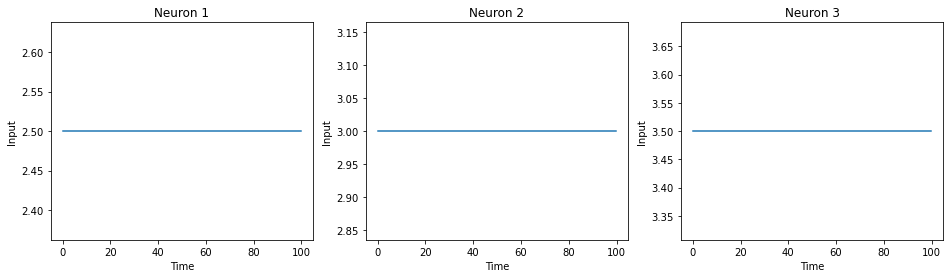

In [155]:
TIME_TOTAL = 100

n1 = LIF(duration=100,currentModel=1)
n2 = LIF(duration=100,currentModel=2)
n3 = LIF(duration=100,currentModel =3 )
n1.currentFunc()
n2.currentFunc()
n3.currentFunc()

currentPlot(neurons)



weights:
 [[0.33333333 0.57923055 0.37873947]
 [0.16593919 0.33333333 0.66132504]
 [0.38837907 0.1621324  0.33333333]]


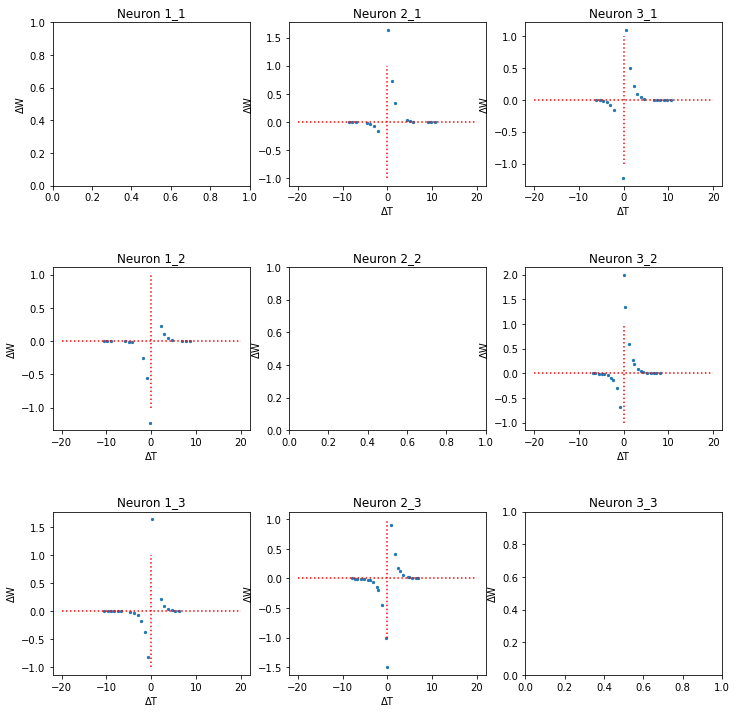

In [156]:
neurons = [n1, n2, n3]
deltaW, deltaT, w = STDPfunc(neurons, time=TIME_TOTAL, Aminus=-1.5, Aplus=2)
print("weights:\n" , w[:,:,-1])

STDPplot(neurons, deltaW, deltaT, w)

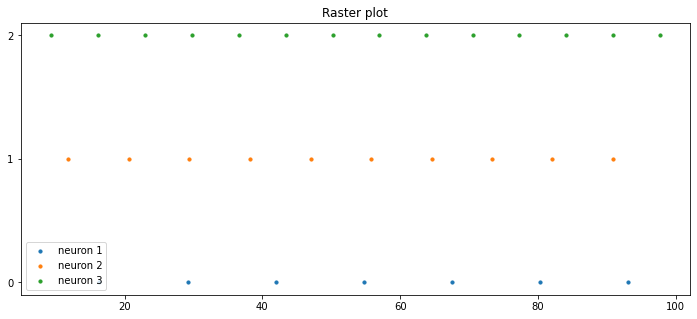

In [157]:
rastorPlots(neurons, deltaW, deltaT, w)

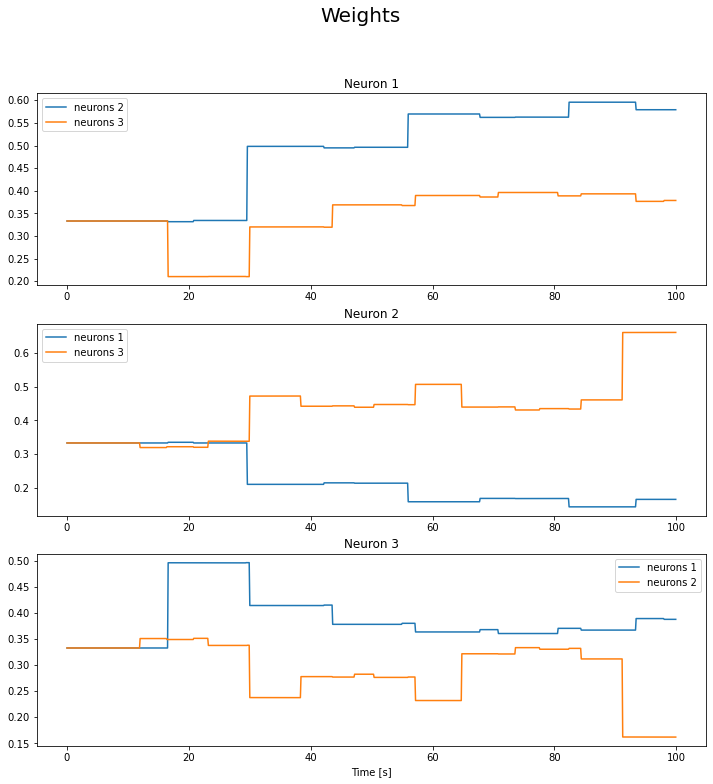

In [158]:
weightPlot(neurons, deltaW, deltaT, w)

# part 1 example 2

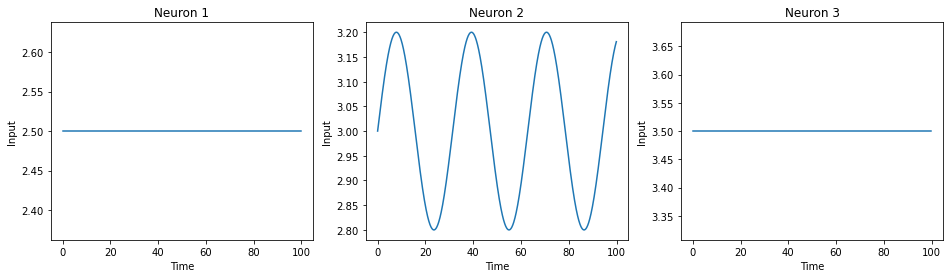

In [160]:
TIME_TOTAL = 100

n4 = LIF(duration=100,currentModel=1)
n5 = LIF(duration=100,currentModel=4)
n6 = LIF(duration=100,currentModel =3 )
n4.currentFunc()
n5.currentFunc()
n6.currentFunc()
neurons1 = [n4, n5, n6]
currentPlot(neurons1)



weights:
 [[0.33333333 0.65548376 0.37873947]
 [0.10750066 0.33333333 0.53733478]
 [0.38837907 0.30522506 0.33333333]]


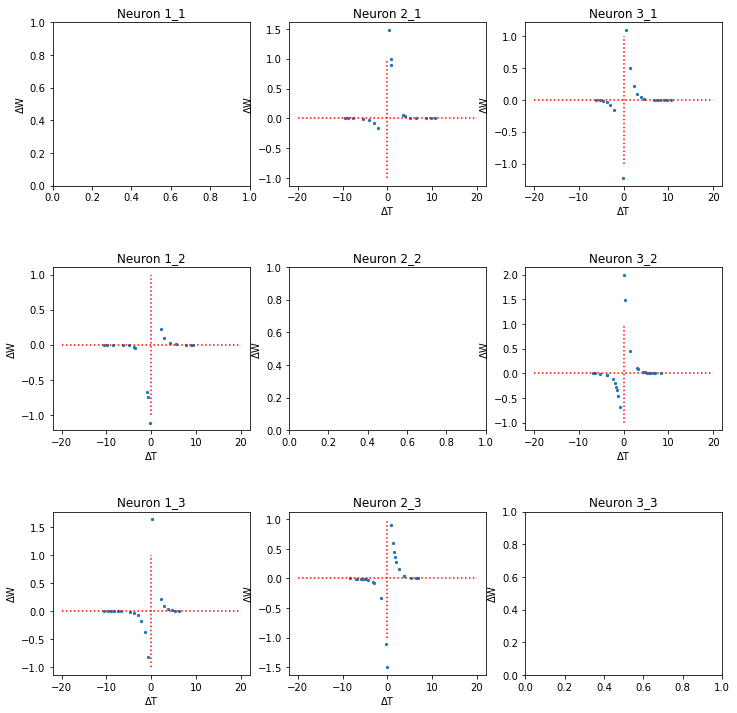

In [161]:
deltaW, deltaT, w = STDPfunc(neurons1, time=TIME_TOTAL, Aminus=-1.5, Aplus=2)
print("weights:\n" , w[:,:,-1])

STDPplot(neurons1, deltaW, deltaT, w)

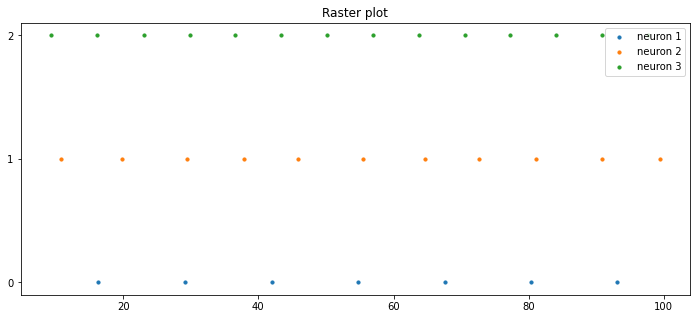

In [162]:
rastorPlots(neurons1, deltaW, deltaT, w)

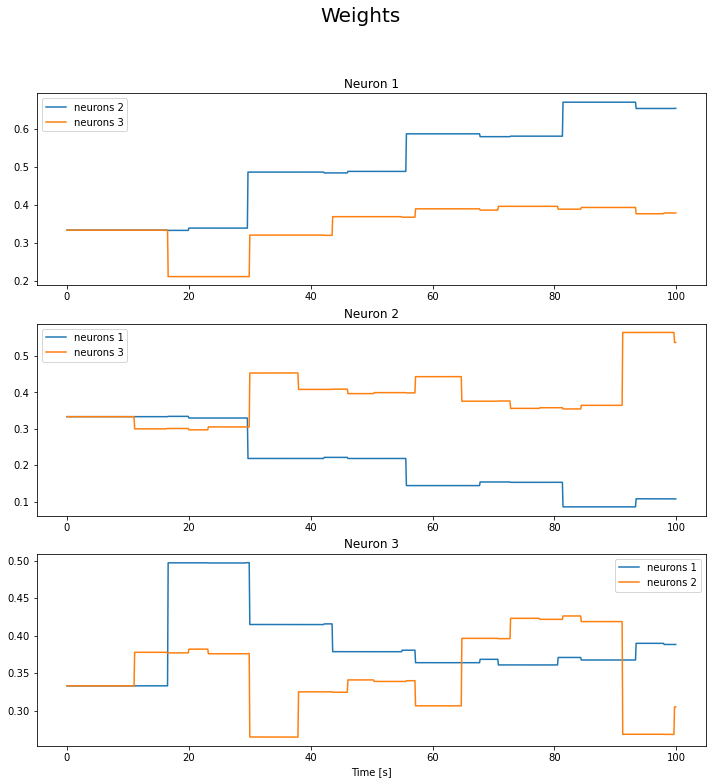

In [163]:
weightPlot(neurons1, deltaW, deltaT, w)

# part 1 example 3

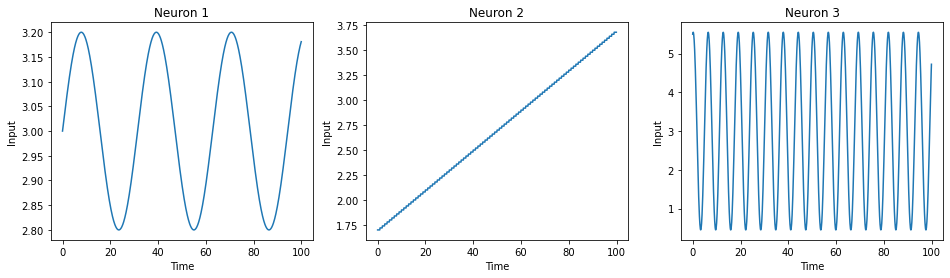

In [191]:
TIME_TOTAL = 100

n7 = LIF(duration=100,currentModel=4)
n8 = LIF(duration=100,currentModel=6)
n9 = LIF(duration=100,currentModel =7 )
n7.currentFunc()
n8.currentFunc()
n9.currentFunc()
neurons2 = [n7, n8, n9]
currentPlot(neurons2)



weights:
 [[0.33333333 0.65548376 0.37873947]
 [0.10750066 0.33333333 0.53733478]
 [0.38837907 0.30522506 0.33333333]]


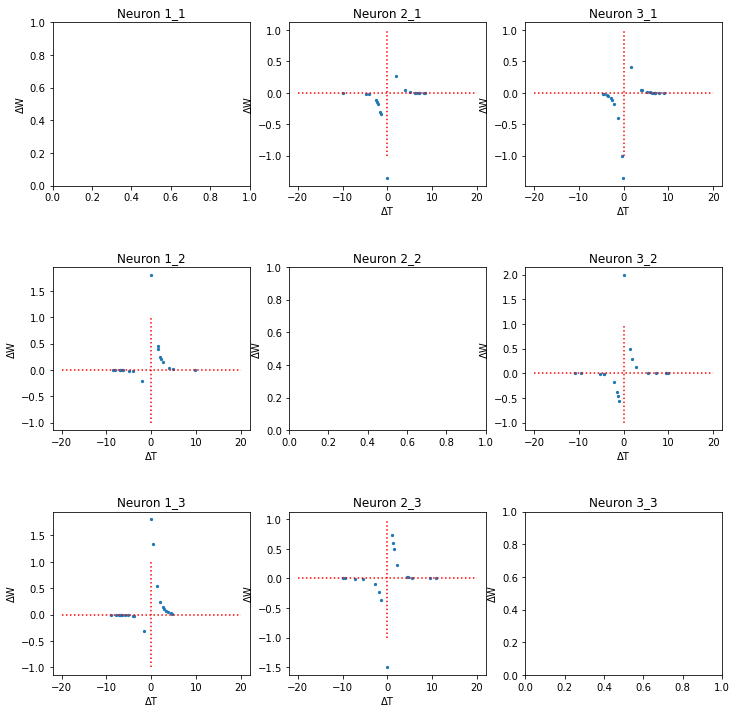

In [192]:
deltaW2, deltaT2, w2 = STDPfunc(neurons2, time=TIME_TOTAL, Aminus=-1.5, Aplus=2)
print("weights:\n" , w[:,:,-1])

STDPplot(neurons2, deltaW2, deltaT2, w2)

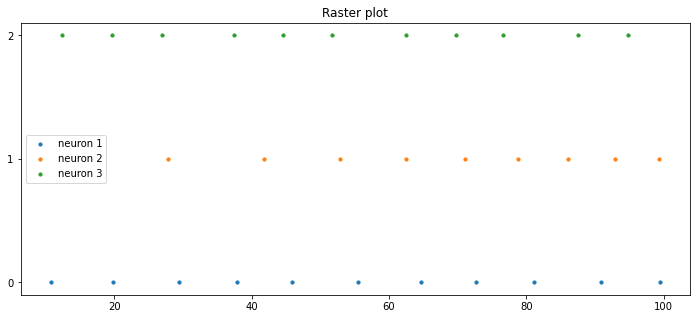

In [193]:
rastorPlots(neurons2, deltaW2, deltaT2, w2)

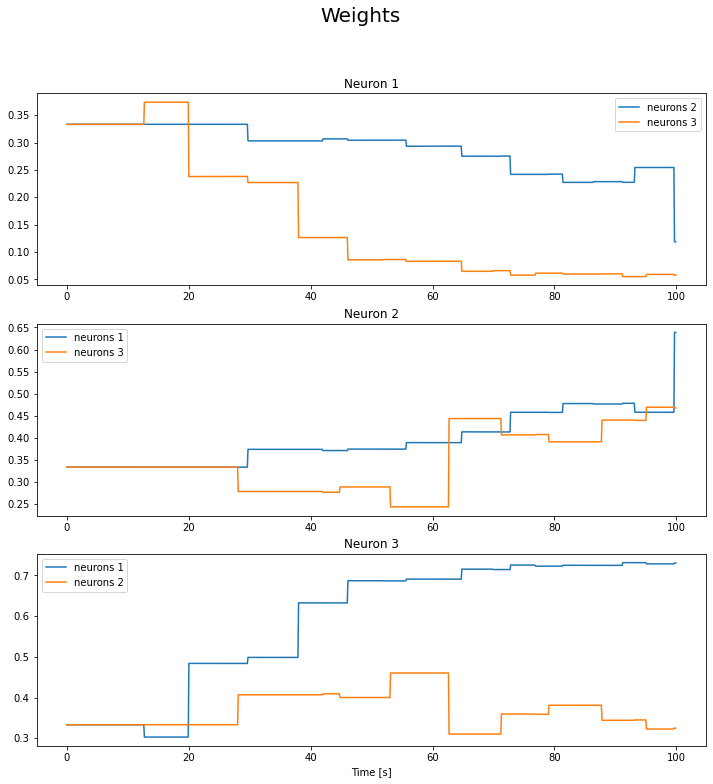

In [194]:
weightPlot(neurons2, deltaW2, deltaT2, w2)

# part2


In [120]:
db=pd.read_excel('./CN_3_DATASET.xlsx')
db

,test,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10
1,1.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0
2,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0
5,5.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
6,output_neuron_number,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10


In [121]:
x_train=dataset.iloc[1:6,1:].values
y_train=dataset.iloc[6,1:].values
x_test=dataset.iloc[10:15,1:].values
y_test=dataset.iloc[15,1:].values

In [122]:
!pip install brian2

In [123]:
from brian2 import *

In [131]:
taupre      = taupost = 20*ms
Apre        = 0.01
Apost       = -Apre*taupre/taupost*1.05
tmax        = 50*ms
spike_dt    = []


pre         = NeuronGroup(5, 'tspike:second', threshold='t>tspike', refractory=100*ms)
post        = NeuronGroup(2, 'tspike:second', threshold='t>tspike', refractory=100*ms)
pre.tspike  = 'i*tmax /(5 -1)'
post.tspike = '(2-1-i)*tmax / (2-1)'

In [134]:
S = Synapses(pre, post,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(i=numpy.arange(10), j=0)
S.connect(i=numpy.arange(10), j=1)

In [138]:
def sag():
    print("sag")
    
def x():
    print("asfsa")

In [137]:
def singlePatternfollow(self,i,time,dt,threshold):
        neuron=self.neuron_list[i]
        S=0
        activity=0
        while self.time_course(S)>threshold:
            if (time-S) in neuron.spikes:
                activity+=self.time_course(S)
            S+=dt
        return activity
def stepForwardOrReser(Self,i,dt,time,neuron,x):
    if s.single == True :
        set_connection=eval('self.'+self.connection_details['type'])
        self.connections=-1*self.connections
    l.append(input+self.population_list[i].connections.mean()*self.activities[i].mean())
    activity=self.population_list[i].single_step(input,self.activities[i],time,dt,threshold_list[i])
    
def fullyConnection(neuron):
    for i in range(1,len(self.network_dim)):
        self.connections.append(np.ones((self.network_dim[i-1],self.network_dim[i]))*self.connection_details['j']+np.random.rand())
        self.connection_history.append(deepcopy(self.connections[-1].ravel()))
        self.tags.append(np.zeros((self.network_dim[i-1],self.network_dim[i])))
def STDPmanager(self,time,dt_minus,dt_plus,a_minus,Aplus):
        
        new_connections=deepcopy(self.connections)
        STDPfunc(nurons,)
        for i in range(len(self.neuron_list)):
            for j in range(len(self.neuron_list)):
                if i!=j:
                    pre_neuron=self.neuron_list[j]
                    post_neuron=self.neuron_list[i]
                    
                    if len(pre_neuron.spikes)!=0 and len(post_neuron.spikes)!=0 and post_neuron.spikes[len(post_neuron.spikes)-1]==time:
                        if post_neuron.spikes[len(post_neuron.spikes)-1]> pre_neuron.spikes[len(pre_neuron.spikes)-1]:
                        dt=abs(post_neuron.spikes[len(post_neuron.spikes)-1]-pre_neuron.spikes[len(pre_neuron.spikes)-1])
                    

In [135]:
def learnProcess(neuron, s):
    learn=eval('self.'+learning_rule)
        time=0
        activity=np.zeros((len(self.neuron_list),1))
        while time<=time_interval:
            inputs=self.connections.dot(activity)
            STDPmanager(time,1,1,-1.5,2)
            for i,neuron in enumerate(self.neuron_list):
                neuron.single_step(input_current_list[i](time)+inputs[i,0],time,dt)
            activity=self.calculate_activity_history(time+dt,dt,time_course_threshold)
            learn(time+dt,dt_minus,dt_plus,a_minus,Aplus)
            time+=dt


        times = np.arange(0, 100, 0.01)
        y = np.zeros_like(times)
        new_connections=deepcopy(self.connections)
        for i in range(len(self.neuron_list)):
            for j in range(len(self.neuron_list)):
                if i!=j:
                    pre_neuron=self.neuron_list[j]
                    post_neuron=self.neuron_list[i]
                    # LTP
                    if len(pre_neuron.spikes)!=0 and len(post_neuron.spikes)!=0 and post_neuron.spikes[len(post_neuron.spikes)-1]==time:
                        if post_neuron.spikes[len(post_neuron.spikes)-1]> pre_neuron.spikes[len(pre_neuron.spikes)-1]:
                            dt=abs(post_neuron.spikes[len(post_neuron.spikes)-1]-pre_neuron.spikes[len(pre_neuron.spikes)-1])
                            new_connections[i,j]+=Aplus*math.exp(-(dt/dt_plus))
                    # LTD
                    if len(pre_neuron.spikes)!=0 and len(post_neuron.spikes)!=0 and pre_neuron.spikes[len(pre_neuron.spikes)-1]==time:
                        if post_neuron.spikes[len(post_neuron.spikes)-1]< pre_neuron.spikes[len(pre_neuron.spikes)-1]:
                            dt=abs(post_neuron.spikes[len(post_neuron.spikes)-1]-pre_neuron.spikes[len(pre_neuron.spikes)-1])
                            new_connections[i,j]+=a_minus*math.exp(-(dt/dt_minus))
                            if new_connections[i,j]<0:
                                new_connections[i,j]=0
        self.connection_history=np.vstack((self.connection_history,new_connections.ravel()))
        self.connections=deepcopy(new_connections)
    
    
    
    
    print('accuracy of SNN on train data: ',metrics.accuracy_score(y_train.astype(np.int32),pred_train.astype(np.int32)))
    print('accuracy of SNN on test data: ',metrics.accuracy_score(y_test.astype(np.int32),pred_test.astype(np.int32)))

In [139]:
learnProcess(neuron,s)

accuracy of SNN on train data:  78.1 %
accuracy of SNN on test data:  69.3 %
